In [1]:
#-----------------------------------------------------------------------------------------------------------------
"IMPORT LIBRARIES"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVR

# https://en.wikipedia.org/wiki/Opinion_polling_for_the_2019_United_Kingdom_general_election

In [2]:
#-----------------------------------------------------------------------------------------------------------------
"DATASET LOADING"

df = pd.read_csv("2019.csv")

df['Date'] = pd.to_datetime(df['Date'])

model_work = "SVR"
###Replacing the Missing Values

# df = df.sort_values(by='Date',ascending=True)

df.set_index("Date", inplace=True)



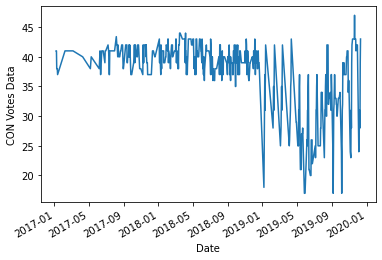

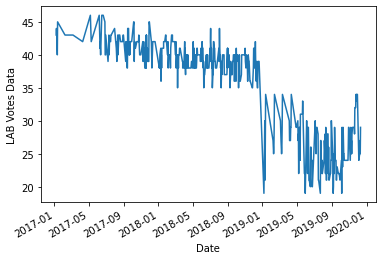

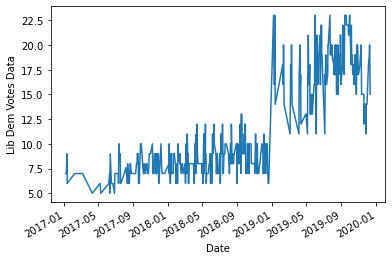

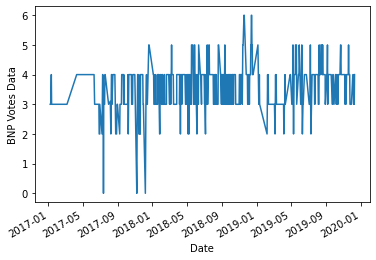

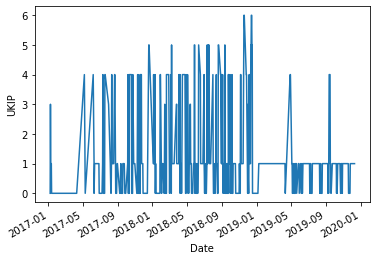

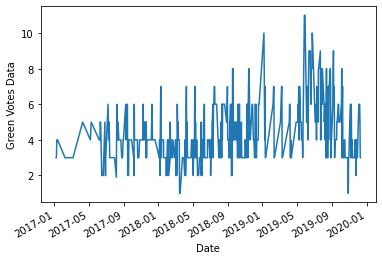

In [3]:
"EDA (Exploratory Data Analysis)"

df['Con'].plot()
plt.ylabel("CON Votes Data")
plt.show()

df['Lab'].plot()
plt.ylabel("LAB Votes Data")
plt.show()

df['Lib Dem'].plot()
plt.ylabel("Lib Dem Votes Data")
plt.show()

df['SNP'].plot()
plt.ylabel("BNP Votes Data")
plt.show()

df['Plaid Cymru'].plot()
plt.ylabel("UKIP")
plt.show()

df['Green'].plot()
plt.ylabel("Green Votes Data")
plt.show()

Mean Absolute Error Con: 0.6691
Mean Squared Error Con: 0.9662
Root Mean Squared Error Con: 0.9829
(R^2) Score Con: 0.6104
Accuracy Con: Con    98.5
dtype: float64



/Users/syedameenbokary/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


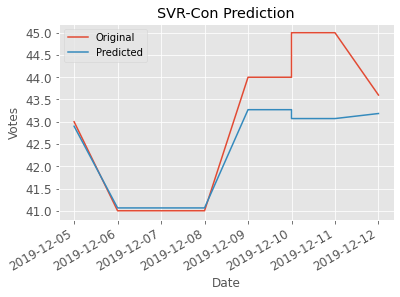

In [4]:
"PREDICTION FOR ONE WEEK"

"One Week Prediction"

df_Z_train = df

# Slice the Data
df_Z_test = pd.read_excel("2019_test.xlsx")

df_Z_test['Date'] = pd.to_datetime(df_Z_test['Date'])

df_Z_test.set_index("Date", inplace=True)



#--------------------------------  CON   ------------------------------------------------------------------------------------
"MODEL PREDICTION"

party = "Con"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = SVR(kernel = 'rbf')
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))

errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()

#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()



Mean Absolute Error Lab: 0.0691
Mean Squared Error Lab: 0.0053
Root Mean Squared Error Lab: 0.0731
(R^2) Score Lab: 0.9928
Accuracy Lab: Lab    99.79
dtype: float64



/Users/syedameenbokary/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


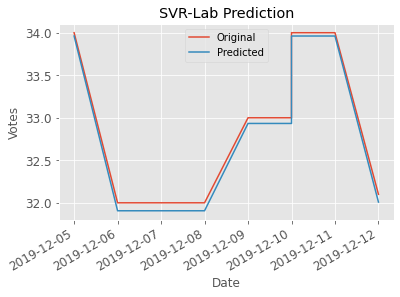

In [5]:
"MODEL PREDICTION"


"One Week Prediction"

df_Z_train = df

# Slice the Data
df_Z_test = pd.read_excel("2019_test.xlsx")

df_Z_test['Date'] = pd.to_datetime(df_Z_test['Date'])

df_Z_test.set_index("Date", inplace=True)


party = "Lab"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = SVR(kernel = 'rbf')
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()

#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()

Mean Absolute Error Lib Dem: 0.0207
Mean Squared Error Lib Dem: 0.0011
Root Mean Squared Error Lib Dem: 0.0338
(R^2) Score Lib Dem: 0.9997
Accuracy Lib Dem: Lib Dem    99.78
dtype: float64



/Users/syedameenbokary/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


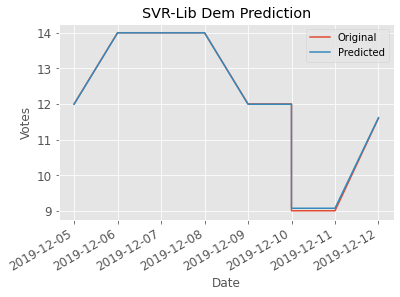

In [6]:
"MODEL PREDICTION"


"One Week Prediction"
df_Z_train = df

# Slice the Data
df_Z_test = pd.read_excel("2019_test.xlsx")

df_Z_test['Date'] = pd.to_datetime(df_Z_test['Date'])

df_Z_test.set_index("Date", inplace=True)


party = "Lib Dem"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = SVR(kernel = 'rbf')
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()
#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()



Mean Absolute Error SNP: 0.1569
Mean Squared Error SNP: 0.028
Root Mean Squared Error SNP: 0.1674
(R^2) Score SNP: 0.992
Accuracy SNP: SNP   -inf
dtype: float64



/Users/syedameenbokary/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


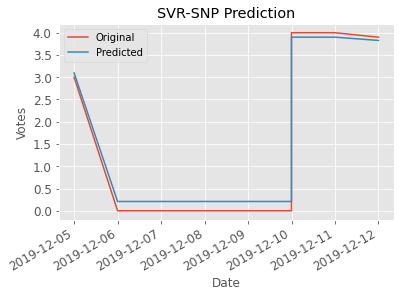

In [7]:
"MODEL PREDICTION"


"One Week Prediction"
df_Z_train = df

# Slice the Data
df_Z_test = pd.read_excel("2019_test.xlsx")

df_Z_test['Date'] = pd.to_datetime(df_Z_test['Date'])

df_Z_test.set_index("Date", inplace=True)


party = "SNP"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = SVR(kernel = 'rbf')
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()
#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()

Mean Absolute Error Plaid Cymru: 0.104
Mean Squared Error Plaid Cymru: 0.0109
Root Mean Squared Error Plaid Cymru: 0.1046
(R^2) Score Plaid Cymru: 0.9367
Accuracy Plaid Cymru: Plaid Cymru   -inf
dtype: float64



/Users/syedameenbokary/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


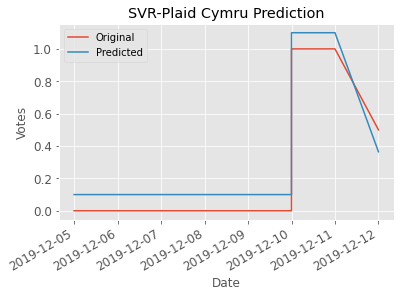

In [8]:
"MODEL PREDICTION"


"One Week Prediction"
df_Z_train = df

# Slice the Data
df_Z_test = pd.read_excel("2019_test.xlsx")

df_Z_test['Date'] = pd.to_datetime(df_Z_test['Date'])

df_Z_test.set_index("Date", inplace=True)

party = "Plaid Cymru"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = SVR(kernel = 'rbf')
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()
#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()

Mean Absolute Error Green: 0.0974
Mean Squared Error Green: 0.0095
Root Mean Squared Error Green: 0.0977
(R^2) Score Green: -0.073
Accuracy Green: Green    96.72
dtype: float64



/Users/syedameenbokary/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


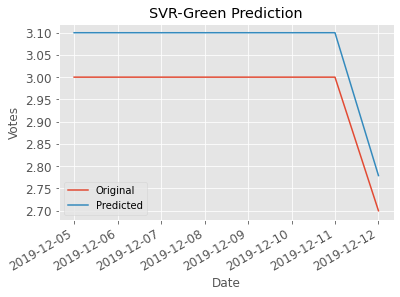

In [9]:
"MODEL PREDICTION"


"One Week Prediction"
df_Z_train = df

# Slice the Data
df_Z_test = pd.read_excel("2019_test.xlsx")

df_Z_test['Date'] = pd.to_datetime(df_Z_test['Date'])

df_Z_test.set_index("Date", inplace=True)

party = "Green"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = SVR(kernel = 'rbf')
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()
#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()